### Set Up


In [1]:
#Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [2]:
#ใส่มาเพราะมันต้อง dowload ver เฉพาะจาก github นี้
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
%pip install -qq git+https://github.com/ShivamShrirao/diffusers
%pip install -q -U --pre triton
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers
#%pip install --upgrade diffusers transformers scipy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 246.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 30.6 MB/s eta 

In [3]:
!pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!pip install --upgrade bitsandbytes

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.33
    Uninstalling jaxlib-0.4.33:
      Successfully uninstalled jaxlib-0.4.33
  Attempting uninstall: jax
    Found existing installation: jax 0.4.33
    Uninstalling jax-0.4.33:
      Successfully uninstalled jax-0.4.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.87 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
chex 0.1.87 requires jaxlib>=0.4.27, but you have jaxlib 0.4.23+cuda12.cudnn89 which is incompatible.
flax 0.8.5 requires jax>=0.4.27, but you have jax 0.4.23 which is incompatible.
optax 0.2.3 requires

In [4]:
#สำหรับเเปลภาษา
!pip install -U deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.4 MB/s eta 0:00:00


In [5]:
#เชื่อมต่อกับ google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Inferrance

In [7]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

#part ไปยัง weight ของ model ที่ train ไว้
model_path = "/content/drive/MyDrive/Work/AiGenWaifu/stable_diffusion_weights/Waifu/800"
pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float32).to("cuda")

#model_path = WEIGHTS_DIR             # If you want to use previously trained model saved in gdrive, replace this with the full path of model in gdrive
#pipe = StableDiffusionPipeline.from_pretrained(model_path, safety_checker=None, torch_dtype=torch.float32).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
g_cuda = None

/usr/local/lib/python3.10/dist-packages/diffusers/models/modeling_utils.py:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location

In [ ]:
#@markdown Can set random seed here for reproducibility.
g_cuda = torch.Generator(device='cuda')
seed = 11 #@param {type:"number"}
g_cuda.manual_seed(seed)

  0%|          | 0/50 [00:00<?, ?it/s]

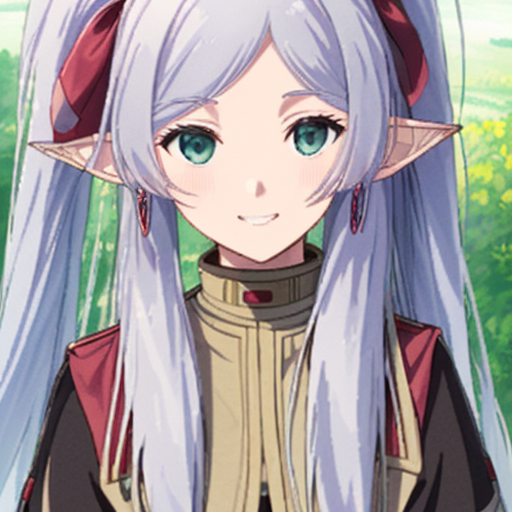

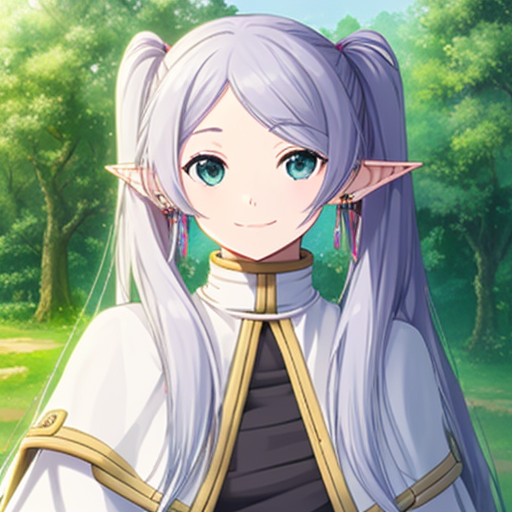

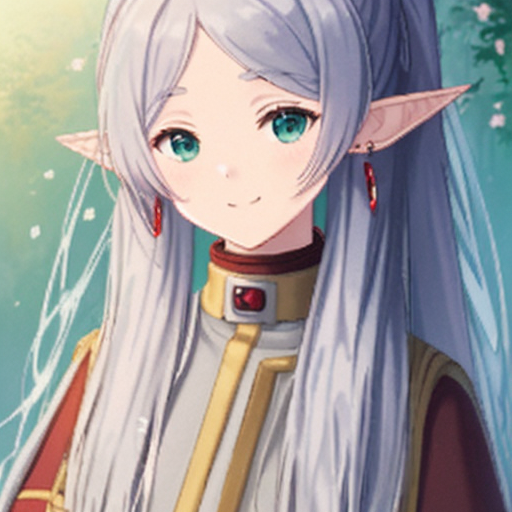

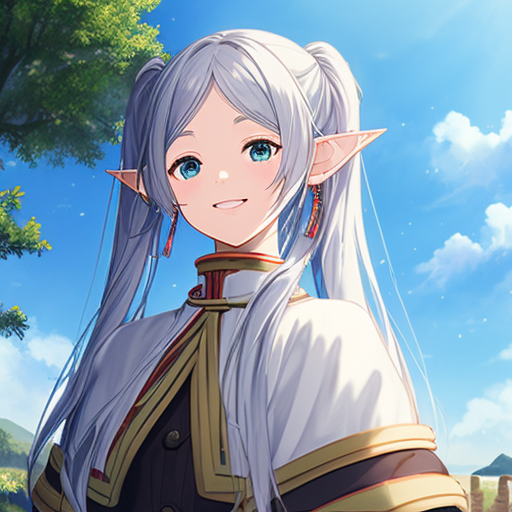

In [ ]:
#@title Run for generating images.

prompt = "best quality, masterpiece, waifu:1.2, frierenxyz, looking at viewer, happy, upper body, in village" #@param {type:"string"}
#prompt = "best quality, masterpiece, waifu:1.2, 1girl, frierenxyz"
negative_prompt = "lowres, ((bad anatomy)), ((bad hands)), text, missing finger, extra digits, fewer digits, blurry, ((mutated hands and fingers)), (poorly drawn face), ((mutation)), ((deformed face)), (ugly), ((bad proportions)), ((extra limbs)), extra face, (double head), (extra head), ((extra feet)), monster, logo, cropped, worst quality, jpeg, humpbacked, long body, long neck, ((jpeg artifacts)), deleted, old, oldest, ((censored)), ((bad aesthetic)), (mosaic censoring, bar censor, blur censor)" #@param {type:"string"}
#negative_prompt = ""
num_samples = 4 #@param {type:"number"}
guidance_scale = 7 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 #@param {type:"number"}
width = 512 #@param {type:"number"}

with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

for img in images:
    display(img)

### Use WebUI

In [ ]:
# Run Gradio UI for generating images.
import gradio as gr
from deep_translator import GoogleTranslator

instructions = """
# วิธีใช้ Waifu Generator

1. **Prompt**
   - ใส่คำอธิบายลักษณะที่ต้องการ เช่น สีผม สีตา หรืออารมณ์
     ตัวอย่าง: `"best quality, masterpiece, waifu:1.2, looking at viewer, happy, upper body"`

2. **Negative Prompt**
   - ใช้สำหรับลบลักษณะที่ไม่ต้องการ เช่น องค์ประกอบที่ไม่สวยงาม
     ตัวอย่าง: `"lowres, ((bad anatomy)), ((bad hands)), text, missing finger"`

3. **Number of Samples**
   - เลือกจำนวนภาพที่ต้องการสร้าง ค่าเริ่มต้นคือ 4

4. **Guidance Scale**
   - ควบคุมระดับที่โมเดลทำตาม prompt ค่าเริ่มต้นแนะนำคือ 7.5

5. **Image Size**
   - ปรับขนาดภาพด้วย Height และ Width ค่าเริ่มต้นคือ 512x512 พิกเซล

6. **Inference Steps**
   - ยิ่งขั้นตอนมาก ภาพก็จะยิ่งละเอียด แต่จะใช้เวลามากขึ้น ค่าเริ่มต้นคือ 30
"""

def inference(promptNT, negative_prompt, num_samples, height=512, width=512, num_inference_steps=50, guidance_scale=7.5):
    prompt = GoogleTranslator(source='auto', target='en').translate(promptNT)  # output -> Weiter so, du bist großartig
    with torch.autocast("cuda"), torch.inference_mode():
        return pipe(
                prompt, height=int(height), width=int(width),
                negative_prompt=negative_prompt,
                num_images_per_prompt=int(num_samples),
                num_inference_steps=int(num_inference_steps), guidance_scale=guidance_scale,
                generator=g_cuda
            ).images

with gr.Blocks() as demo:
    gr.Markdown("<h1 style='text-align: center;'>Waifu Generator</h1>")  # เพิ่มชื่อที่นี่
    gr.Markdown(instructions)  # เพิ่มคำอธิบายที่นี่
    # แสดงภาพตัวอย่าง
    gr.Markdown("<h2 style='text-align: center;'>ตัวอย่างภาพ Prompt : best quality, masterpiece, waifu:1.2, frierenxyz, looking at viewer, happy, upper body, in village</h2>")
    example_image = gr.Image("/content/drive/MyDrive/Work/AiGenWaifu/ExImg/Screenshot 2024-10-08 220018.png", label="Example Image", width=300, height=300)  # ลดขนาดของภาพ  # แสดงภาพที่ต้องการ
    with gr.Row():
        with gr.Column():
            prompt = gr.Textbox(label="Prompt", value="best quality, masterpiece, waifu:1.2, 1girl, adult,red eye, black hair, long twin tail hair, black sailor collar, black school uniform, red neckerchief , looking at viewer, upper body, wonder, outdoor")
            negative_prompt = gr.Textbox(label="Negative Prompt", value="lowres, ((bad anatomy)), ((bad hands)), text, missing finger, extra digits, fewer digits, blurry, ((mutated hands and fingers)), (poorly drawn face), ((mutation)), ((deformed face)), (ugly), ((bad proportions)), ((extra limbs)), extra face, (double head), (extra head), ((extra feet)), monster, logo, cropped, worst quality, jpeg, humpbacked, long body, long neck, ((jpeg artifacts)), deleted, old, oldest, ((censored)), ((bad aesthetic)), (mosaic censoring, bar censor, blur censor)")
            run = gr.Button(value="Generate")
            with gr.Row():
                num_samples = gr.Number(label="Number of Samples", value=4)
                guidance_scale = gr.Number(label="Guidance Scale", value=7.5)
            with gr.Row():
                height = gr.Number(label="Height", value=512)
                width = gr.Number(label="Width", value=512)
            num_inference_steps = gr.Slider(label="Steps", value=30)
        with gr.Column():
            gallery = gr.Gallery()

    run.click(inference, inputs=[prompt, negative_prompt, num_samples, height, width, num_inference_steps, guidance_scale], outputs=gallery)

demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b200c4e1986f259d8d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]